# Processing of Image data into Python compatible dataset


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os, cv2
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

from model_utils import num_to_bin, bin_to_num


In [4]:
DATA_RAW = os.path.join('..', '..', 'Data Raw')
DATASETS = os.path.join('..', '..', 'Datasets', 'numpy_datasets')
DICTS = os.path.join('..', 'dicts')

## Processing ABC, BCD and Braille37 Datasets

In [5]:
abc_raw = os.path.join(DATA_RAW, 'Arabic Braille Characters Kaggle')
bcd_raw = os.path.join(DATA_RAW, 'Braille Dataset Kaggle', 'Dataset')
b37_raw = os.path.join(DATA_RAW, 'Braille37')

In [41]:
with open(os.path.join(DICTS, 'abc_dict.json'), encoding='utf-8') as dict_file:
    abc_dict = json.load(dict_file)
abc_dict

{'آ': '001110',
 'أ': '001100',
 'ؤ': '110011',
 'ئ': '110101',
 'ا': '100000',
 'ب': '110000',
 'ت': '011110',
 'ث': '100111',
 'ج': '010110',
 'ح': '100011',
 'خ': '101101',
 'د': '100110',
 'ذ': '011101',
 'ر': '111010',
 'س': '011100',
 'ش': '100101',
 'ص': '111101',
 'ض': '110101',
 'ط': '011111',
 'ظ': '111111',
 'ع': '111011',
 'غ': '110001',
 'ف': '110100',
 'ق': '111110',
 'ك': '101000',
 'ل': '000111',
 'م': '101100',
 'ن': '101110',
 'ه': '110010',
 'و': '010111',
 'ى': '101010',
 'ي': '010100'}

In [6]:
with open(os.path.join(DICTS, 'b37_dict.json'), encoding='utf-8') as dict_file:
    b37_dict = json.load(dict_file)
b37_dict

{'a': '100000',
 'b': '110000',
 'c': '100100',
 'd': '100110',
 'e': '100010',
 'f': '110100',
 'g': '110110',
 'h': '110010',
 'i': '010100',
 'j': '010110',
 'k': '101000',
 'l': '111000',
 'm': '101100',
 'n': '101110',
 'o': '101010',
 'p': '111100',
 'q': '111110',
 'r': '111010',
 's': '011100',
 't': '011110',
 'u': '101001',
 'v': '111001',
 'w': '010111',
 'x': '101101',
 'y': '101111',
 'z': '101011',
 'apostrophe': '001000',
 'capitalize': '000001',
 'colon': '010010',
 'comma': '010000',
 'exclamation mark': '011010',
 'hyphen': '001001',
 'number': '001111',
 'period or decimal point': '010011',
 'question mark': '011001',
 'semicolon': '011000',
 'space': '000000'}

### ABC

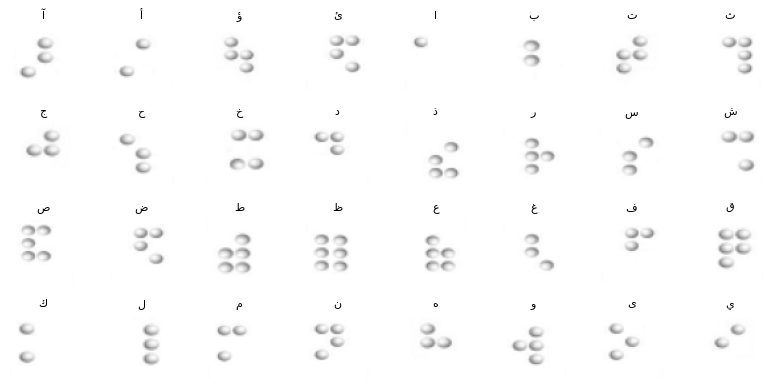

In [42]:
fig, axes = plt.subplots(4, 8, figsize=(8, 4))
axes = axes.flatten()

subdirs = [d for d in os.listdir(abc_raw) if os.path.isdir(os.path.join(abc_raw, d))]

for i, subdir in enumerate(subdirs[:32]):  # Limit to 32 subdirectories for 4x8 grid
    subdir_path = os.path.join(abc_raw, subdir)
    
    # Find the first PNG file in the subdirectory
    png_files = [f for f in os.listdir(subdir_path) if f.lower().endswith('.png')]
    
    if png_files:
        img_path = os.path.join(subdir_path, png_files[5])
        # img = cv2.imread(img_path)
        
        with open(img_path, 'rb') as f:
            img_bytes = np.asarray(bytearray(f.read()), dtype=np.uint8)
            img = cv2.imdecode(img_bytes, cv2.IMREAD_COLOR)
        
        if img is not None:
            # Convert BGR to RGB for proper display
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axes[i].imshow(img_rgb)
        else:
            axes[i].text(0.5, 0.5, 'Image\nLoad Error', ha='center', va='center', transform=axes[i].transAxes)
    else:
        axes[i].text(0.5, 0.5, 'No PNG\nFound', ha='center', va='center', transform=axes[i].transAxes)
    
    axes[i].set_title(subdir, fontsize=8)
    axes[i].axis('off')

# Hide any unused subplots
for i in range(len(subdirs), 32):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
BRAILLE_W, BRAILLE_H = 30, 40

subdirs = [d for d in os.listdir(abc_raw) if os.path.isdir(os.path.join(abc_raw, d))]

x_data = []
y_data = []

for i, subdir in enumerate(subdirs):
    subdir_path = os.path.join(abc_raw, subdir)
    y_label_str = abc_dict[subdir]
    y_label = [list(map(int, y_label_str))]
    
    # Find the first PNG file in the subdirectory
    png_files = [f for f in os.listdir(subdir_path) if f.lower().endswith('.png')]
    
    for file in png_files:
        img_path = os.path.join(subdir_path, file)
        # img = cv2.imread(img_path)
        
        with open(img_path, 'rb') as f:
            img_bytes = np.asarray(bytearray(f.read()), dtype=np.uint8)
            img = cv2.imdecode(img_bytes, cv2.IMREAD_COLOR)
        
        if img is not None:
            # Convert BGR to RGB for proper display
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            resized = cv2.resize(img_rgb, (BRAILLE_W, BRAILLE_H), interpolation = cv2.INTER_AREA)
            x_data.append(resized)
            y_data.append(y_label)
    
        else:
            print(f'Image Load Error: {file}')
x_data = np.array(x_data)
y_data = np.array(y_data)

x_data.shape, y_data.shape

((3168, 40, 30, 3), (3168, 1, 6))

In [53]:
y_data = y_data.reshape((-1, 6))

In [54]:
y_data[:5]

array([[0, 0, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 0]])

In [55]:
np.savez(os.path.join(DATASETS, 'abc.npz'), test_x=x_data, test_y=y_data)

### BCD

In [10]:
BRAILLE_W, BRAILLE_H = 30, 40

x_data = []
y_data = []

# Find the first PNG file in the subdirectory
img_files = [f for f in os.listdir(bcd_raw) if f.lower().endswith('.jpg')]

for file in img_files:
    img_path = os.path.join(bcd_raw, file)
    filename = os.path.splitext(os.path.basename(file))[0].lower()
    lbl_key = 'space' if filename.startswith('space') else filename[0]
    y_label_str = b37_dict.get(lbl_key)
    if y_label_str is None:
        print(f'Label not found for file: {filename}')
        continue
    y_label = [list(map(int, y_label_str))]
    with open(img_path, 'rb') as f:
        img_bytes = np.asarray(bytearray(f.read()), dtype=np.uint8)
        img = cv2.imdecode(img_bytes, cv2.IMREAD_COLOR)
    
    if img is not None:
        # Convert BGR to RGB for proper display
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        resized = cv2.resize(img_rgb, (BRAILLE_W, BRAILLE_H), interpolation = cv2.INTER_AREA)
        x_data.append(resized)
        y_data.append(y_label)
    else:
        print(f'Image Load Error: {file}')
x_data = np.array(x_data)
y_data = np.array(y_data)

x_data.shape, y_data.shape

((1560, 40, 30, 3), (1560, 1, 6))

In [12]:
y_data = y_data.reshape((-1, 6))

In [13]:
y_data[:5]

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [14]:
np.savez(os.path.join(DATASETS, 'bcd.npz'), test_x=x_data, test_y=y_data)

### Braile37

In [ ]:
b37_labelling_fmt = {
    'braille_marin': 'folder_labels',
    "Helen's Datasets": 'folder_labels',
    'More Chars': 'folder_labels',
    "Ting-Yi's Complete Dataset": 'folder_labels',
    "Wan-Chun's Chars": 'folder_labels',

    "Wan-Chun's Sets": 'file_labels',
    'Embossed chars': 'file_labels',
    'filename_labelled': 'file_labels',
    'Full Alphabets': 'file_labels',
}

In [69]:
import glob
from tqdm import tqdm



In [74]:
BRAILLE_W, BRAILLE_H = 30, 40

main_dirs = list(b37_labelling_fmt.keys())
img_extensions = ('*.png', '*.jpg', '*.jpeg')

x_data = []
y_data = []

for i, md in enumerate(main_dirs):
    print(f"Processing {md}...")
    folder_labels = b37_labelling_fmt[md] == 'folder_labels'
    
    main_d = os.path.join(b37_raw, md)
    if folder_labels:
        subdirs = [d for d in os.listdir(main_d) if os.path.isdir(os.path.join(main_d, d))]
        
        for subdir in tqdm(subdirs, desc=f"Processing subdirectories", total=len(subdirs)):
            subdir_path = os.path.join(main_d, subdir)
            y_label_str = b37_dict[str.lower(subdir)]
            y_label = [list(map(int, y_label_str))]
            
            img_files = []
            for ext in img_extensions:
                img_files.extend(glob.glob(os.path.join(subdir_path, '**', ext), recursive=True))
            
            for file in img_files:
                with open(file, 'rb') as f:
                    img_bytes = np.asarray(bytearray(f.read()), dtype=np.uint8)
                    img = cv2.imdecode(img_bytes, cv2.IMREAD_COLOR)
                
                if img is not None:
                    # Convert BGR to RGB for proper display
                    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    resized = cv2.resize(img_rgb, (BRAILLE_W, BRAILLE_H), interpolation = cv2.INTER_AREA)
                    x_data.append(resized)
                    y_data.append(y_label)
                else:
                    print(f'Image Load Error: {file}')
    else:
        img_files = []
        for ext in img_extensions:
            img_files.extend(glob.glob(os.path.join(main_d, '**', ext), recursive=True))
        
        for file in tqdm(img_files, desc="Processing images", total=len(img_files)):
            filename = os.path.splitext(os.path.basename(file))[0].lower()
            lbl_key = 'space' if filename.startswith('space') else filename[0]
            y_label_str = b37_dict.get(lbl_key)
            if y_label_str is None:
                print(f'Label not found for file: {filename}')
                continue
            y_label = [list(map(int, y_label_str))]
            with open(file, 'rb') as f:
                img_bytes = np.asarray(bytearray(f.read()), dtype=np.uint8)
                img = cv2.imdecode(img_bytes, cv2.IMREAD_COLOR)
            
            if img is not None:
                # Convert BGR to RGB for proper display
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                resized = cv2.resize(img_rgb, (BRAILLE_W, BRAILLE_H), interpolation = cv2.INTER_AREA)
                x_data.append(resized)
                y_data.append(y_label)
            else:
                print(f'Image Load Error: {file}')
        
x_data = np.array(x_data)
y_data = np.array(y_data)

x_data.shape, y_data.shape

Processing braille_marin...


Processing subdirectories: 100%|██████████| 22/22 [00:00<00:00, 46.49it/s]


Processing Embossed chars...


Processing images: 100%|██████████| 36/36 [00:00<00:00, 450.86it/s]


Processing filename_labelled...


Processing images: 100%|██████████| 1404/1404 [00:03<00:00, 433.71it/s]


Processing Full Alphabets...


Processing images: 100%|██████████| 572/572 [00:01<00:00, 504.76it/s]


Processing Helen's Datasets...


Processing subdirectories: 100%|██████████| 5/5 [00:00<00:00,  7.26it/s]


Processing More Chars...


Processing subdirectories: 100%|██████████| 26/26 [00:05<00:00,  4.47it/s]


Processing Ting-Yi's Complete Dataset...


Processing subdirectories: 100%|██████████| 37/37 [00:50<00:00,  1.36s/it]


Processing Wan-Chun's Chars...


Processing subdirectories: 100%|██████████| 26/26 [00:02<00:00,  9.90it/s]


Processing Wan-Chun's Sets...


Processing images: 100%|██████████| 338/338 [00:00<00:00, 471.65it/s]


((30608, 40, 30, 3), (30608, 1, 6))

In [76]:
y_data = y_data.reshape((-1, 6))

In [77]:
y_data[:5]

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [78]:
np.savez(os.path.join(DATASETS, 'b37.npz'), test_x=x_data, test_y=y_data)

## Testing YOLO segmented samples colour-bands

In [90]:
from torchvision.transforms import functional, Resize
import torch

In [21]:
img_file = os.path.join('..', '..', 'Datasets', 'braille_angelina', 'train', "images", "Angelina Dataset_kov_8.png")
lbl_file = img_file.replace('images', 'labels').replace('.png', '.txt')
page_sample = cv2.imread(img_file)
page_h, page_w, _ = page_sample.shape
page_dims = np.array([page_w, page_h])

labels_df = pd.DataFrame(columns=['Label', 'X', 'Y', 'W', 'H'])
with open(lbl_file, 'r') as temp_file:
    for line in temp_file.readlines():
        labels_df.loc[len(labels_df)] = [float(l) for l in line.split(" ")]
    
data_X = []
i = 0
for group, sample in labels_df.groupby(["X", "Y", "W", "H"]):
    center = np.array(group[0:2]) * page_dims
    dims = 0.5 * (np.array(group[2:4]) * page_dims)
    indices = list(sample['Label'].astype(int))

    coord0 = np.floor(center - dims).astype(int)
    coord1 = np.ceil(center + dims).astype(int)
    
    coord0[coord0 < 0] = 0
    coord1[coord1 < 0] = 0

    new_sample = page_sample[coord0[1]:coord1[1], coord0[0]:coord1[0]]
    lbl = np.array([0]*6)
    lbl[indices] = 1

    # cv2.imwrite(os.path.join(DATA_OUT, "temp", f"sample_{sample_count}.png"), new_sample)
    try:
        resized = cv2.resize(new_sample, (30, 40), interpolation = cv2.INTER_AREA)
    except cv2.error:
        print(f"Broken sample:  size {new_sample.shape}, filename {img_file}")
        print(f"Original info {group}, processed dims {coord0} to {coord1}")
    data_X.append(resized)
    i += 1
    if i == 10:
        break

In [23]:
data_X = np.array(data_X)
data_X.shape

(10, 40, 30, 3)

In [43]:
np.savez('temp.npz', train_x=data_X, train_y=None,
            val_x=None, val_y=None, test_x=None, test_y=None)

In [35]:
data_X.shape

(10, 40, 30, 3)

In [38]:
np.array([np.expand_dims(cv2.cvtColor(sub_x, cv2.COLOR_RGB2GRAY), axis=2) for sub_x in data_X]).shape

(10, 40, 30, 1)

In [87]:
torch.Tensor(data_X).permute(0, 3, 1, 2).shape

torch.Size([10, 3, 40, 30])

In [91]:
functional.rgb_to_grayscale(torch.Tensor(data_X).permute(0, 3, 1, 2)).shape

torch.Size([10, 1, 40, 30])

In [93]:
Resize((20,20))(torch.Tensor(data_X).permute(0, 3, 1, 2))

torch.Size([10, 3, 20, 20])

<Axes: >

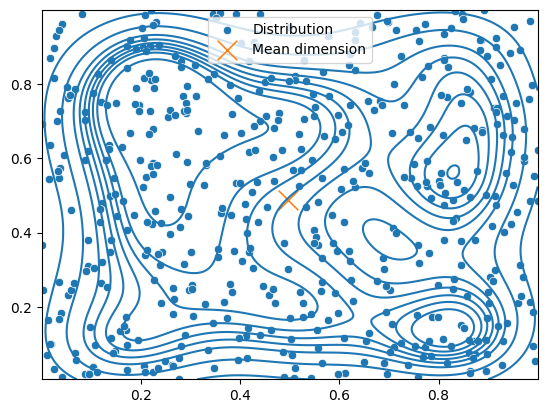

In [42]:
xx = np.random.rand(500)
yy = np.random.rand(500)
sns.scatterplot(x=xx, y=yy, label='Distribution')
sns.kdeplot(x=xx, y=yy, fill=False, cut=0)
sns.scatterplot(x=[xx.mean()], y=[yy.mean()], marker='x', label='Mean dimension', s=200)

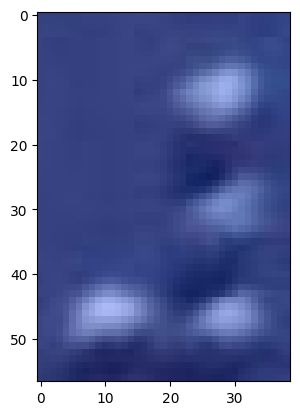

In [20]:
# plt.imshow(new_sample[:,:,[2,1,0]])
plt.imshow(new_sample)

In [13]:
img_file = os.path.join('..', '..', 'Datasets', 'braille_dsbi', 'test', "images", "DSBI_Book1_0.png")
lbl_file = img_file.replace('images', 'labels').replace('.png', '.txt')
page_sample = cv2.imread(img_file)
page_h, page_w, _ = page_sample.shape
page_dims = np.array([page_w, page_h])

labels_df = pd.DataFrame(columns=['Label', 'X', 'Y', 'W', 'H'])
with open(lbl_file, 'r') as temp_file:
    for line in temp_file.readlines():
        labels_df.loc[len(labels_df)] = [float(l) for l in line.split(" ")]
        
for group, sample in labels_df.groupby(["X", "Y", "W", "H"]):
    center = np.array(group[0:2]) * page_dims
    dims = 0.5 * (np.array(group[2:4]) * page_dims)
    indices = list(sample['Label'].astype(int))

    coord0 = np.floor(center - dims).astype(int)
    coord1 = np.ceil(center + dims).astype(int)
    
    coord0[coord0 < 0] = 0
    coord1[coord1 < 0] = 0

    new_sample = page_sample[coord0[1]:coord1[1], coord0[0]:coord1[0]]
    lbl = np.array([0]*6)
    lbl[indices] = 1

    # cv2.imwrite(os.path.join(DATA_OUT, "temp", f"sample_{sample_count}.png"), new_sample)
    try:
        resized = cv2.resize(new_sample, (30, 40), interpolation = cv2.INTER_AREA)
    except cv2.error:
        print(f"Broken sample:  size {new_sample.shape}, filename {img_file}")
        print(f"Original info {group}, processed dims {coord0} to {coord1}")
    break

In [14]:
new_sample.shape

(66, 57, 3)

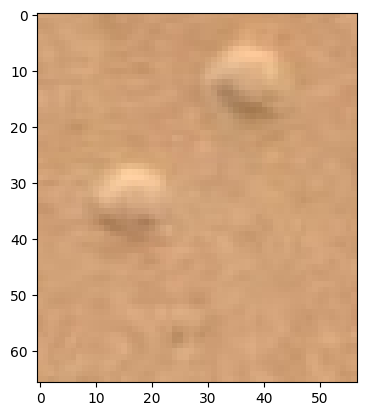

In [16]:
plt.imshow(new_sample[:,:,[2,1,0]])

## Data loading

In [79]:
angelina = os.path.join(DATASETS, "angelina.npz")
dsbi = os.path.join(DATASETS, "dsbi.npz")
abc = os.path.join(DATASETS, "abc.npz")
b37 = os.path.join(DATASETS, "b37.npz")

data = np.load(angelina)
ood_dsbi = np.load(dsbi)
ood_abc = np.load(abc)
ood_b37 = np.load(b37)
print(data['train_x'].shape)
print(ood_dsbi['test_x'].shape)
print(ood_abc['test_x'].shape)
print(ood_b37['test_x'].shape)

(69267, 40, 30, 3)
(45627, 40, 30, 3)
(3168, 40, 30, 3)
(30608, 40, 30, 3)


In [80]:
train_X = data["train_x"]
train_Y = data["train_y"]

dsbi_X = ood_dsbi['test_x']
dsbi_Y = ood_dsbi['test_y']

abc_X = ood_abc['test_x']
abc_Y = ood_abc['test_y']

b37_X = ood_b37['test_x']
b37_Y = ood_b37['test_y']

In [48]:
N, p = train_Y.shape
K = 6

In [49]:
train_Y.shape

(69267, 6)

### Class Balance

In [14]:
print("Bias in original labels of full data:")
train_Y_class = np.array([bin_to_num(s) for s in train_Y])
uniq, counts = np.unique(train_Y_class, return_counts=True)
t = []
for i in range(64):
    if i in uniq:
        index = list(uniq).index(i)
        t.append(counts[index])
    else:
        t.append(0)

print(t)
balance_og = np.round( t / sum(t), 4) * 100
print(balance_og)

Bias in original labels of full data:
[0, 5692, 1448, 1264, 65, 2821, 30, 2831, 47, 380, 4174, 229, 11, 1975, 2864, 1824, 7, 4771, 638, 587, 6, 6057, 376, 2782, 302, 2104, 865, 1237, 67, 3401, 3718, 951, 47, 124, 119, 49, 995, 1866, 84, 9, 81, 0, 88, 1300, 19, 179, 1282, 886, 39, 673, 1377, 339, 77, 1062, 164, 33, 71, 2, 2479, 2, 1045, 4, 1070, 178]
[0.   8.22 2.09 1.82 0.09 4.07 0.04 4.09 0.07 0.55 6.03 0.33 0.02 2.85
 4.13 2.63 0.01 6.89 0.92 0.85 0.01 8.74 0.54 4.02 0.44 3.04 1.25 1.79
 0.1  4.91 5.37 1.37 0.07 0.18 0.17 0.07 1.44 2.69 0.12 0.01 0.12 0.
 0.13 1.88 0.03 0.26 1.85 1.28 0.06 0.97 1.99 0.49 0.11 1.53 0.24 0.05
 0.1  0.   3.58 0.   1.51 0.01 1.54 0.26]


<BarContainer object of 64 artists>

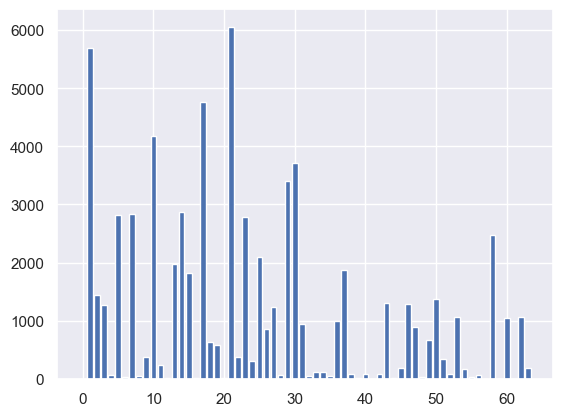

In [15]:
plt.bar(range(64), t)

In [16]:
train_counts = np.sum(train_Y, axis=0)
balance_bin = np.round(train_counts / train_Y.shape[0], 4) * 100

ood_counts = np.sum(ood_Y, axis=0)
balance_ood = np.round(ood_counts / ood_Y.shape[0], 4) * 100

print("Bias in binary labels of full data:")
print(train_counts)
print(balance_bin)

print("Bias in binary labels of ood data:")
print(ood_counts)
print(balance_ood)

Bias in binary labels of full data:
[45612 35277 38732 32835 36484 15743]
[65.85 50.93 55.92 47.4  52.67 22.73]
Bias in binary labels of ood data:
[21853 21988 19235 18188 24600 16253]
[47.89 48.19 42.16 39.86 53.92 35.62]


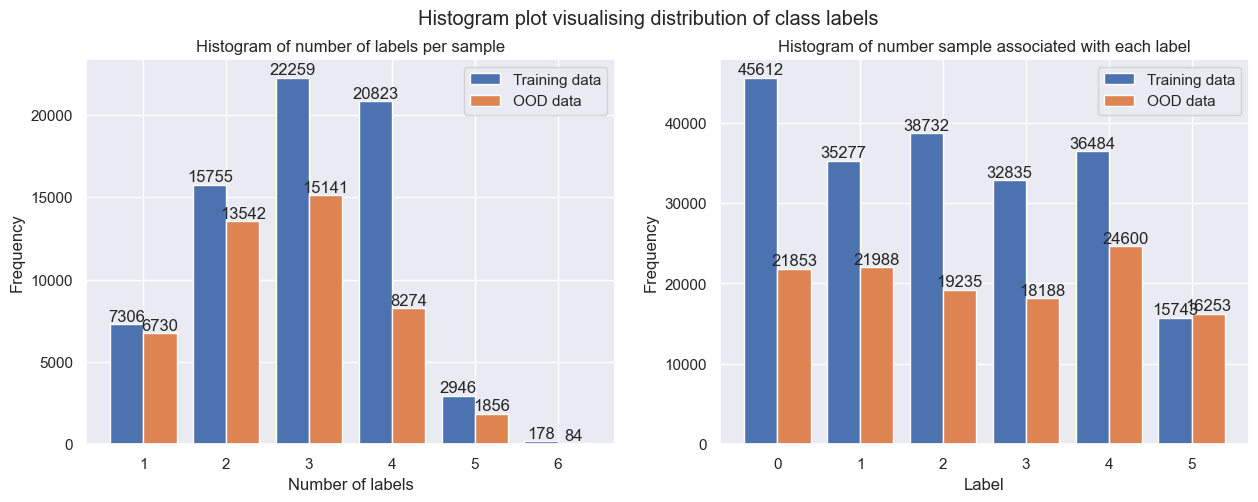

In [17]:
sns.set_theme()
fig, axes = plt.subplots(1, 2, figsize=(15,5))
counts, edges, bars = axes[0].hist([np.sum(train_Y, axis=1), np.sum(ood_Y, axis=1)], 
                                bins=np.arange(0.5,7), label=["Training data", "OOD data"])
for bar in bars:
    axes[0].bar_label(bar)

xs = np.arange(6)

barplot = axes[1].bar(x=xs-0.2, height=train_counts, label="Training data", width=0.4)
axes[1].bar_label(barplot)

barplot = axes[1].bar(x=xs+0.2, height=ood_counts, label="OOD data", width=0.4)
axes[1].bar_label(barplot)

plt.suptitle("Histogram plot visualising distribution of class labels")
axes[0].set_title("Histogram of number of labels per sample")
axes[0].set_ylabel("Frequency")
axes[0].legend()
axes[0].set_xlabel("Number of labels")
axes[1].set_title("Histogram of number sample associated with each label")
axes[1].set_ylabel("Frequency")
axes[1].legend()
axes[1].set_xlabel("Label");

In [18]:
cardinality = np.sum(np.sum(train_Y)) / N
density = cardinality / K

print(f"Training Label cardinality (avg labels per sample): {round(cardinality, 4)}")
print(f"Training Label density (cardinality scaled by labelcount): {round(density, 4)}")

Training Label cardinality (avg labels per sample): 2.955
Training Label density (cardinality scaled by labelcount): 0.4925


In [19]:
N_o, p_o = ood_Y.shape
K_o = 6
cardinality_o = np.sum(np.sum(ood_Y)) / N_o
density_o = cardinality_o / K_o

print(f"OOD Label cardinality (avg labels per sample): {round(cardinality_o, 4)}")
print(f"OOD Label density (cardinality scaled by labelcount): {round(density_o, 4)}")

OOD Label cardinality (avg labels per sample): 2.6764
OOD Label density (cardinality scaled by labelcount): 0.4461


In [24]:
# Within-label imbalance:
print("Majority : Minority ratio for each label in training data")
print(np.repeat(N, 6) / train_counts)

print("Within-label balance expressed as percentage of positive samples per label")
print(100 * train_counts / N)

print()
# Within-label imbalance:
print("Majority : Minority ratio for each label in OOD data")
print(np.repeat(N_o, 6) / ood_counts)

print("Within-label balance expressed as percentage of positive samples per label")
print(100 * ood_counts / N_o)

Majority : Minority ratio for each label in training data
[1.51861352 1.96351731 1.78836621 2.10954774 1.89855827 4.39986026]
Within-label balance expressed as percentage of positive samples per label
[65.84953874 50.92901382 55.91695901 47.40352549 52.67154634 22.72799457]

Majority : Minority ratio for each label in OOD data
[2.08790555 2.07508641 2.37208214 2.50863207 1.8547561  2.80729711]
Within-label balance expressed as percentage of positive samples per label
[47.8948868  48.19076424 42.15705613 39.8623622  53.9154448  35.62145221]


In [56]:
# Between-label balance
# Imbalance ratio per label
print("Charte et al between-label imbalance, showing ratio of Majority label to each label individually")
print()

IRpL = np.max(train_counts) / train_counts
IRpL_std = np.sqrt(sum((IRpL - np.mean(IRpL)) ** 2 / (len(IRpL) - 1)))
IRpLpI = train_Y[:5] * IRpL
SCUMBLEi = 1 - IRpLpI.prod(axis=1) ** (1 / K) / np.mean(IRpLpI)
SCUMBLE = np.mean(SCUMBLEi)

print('Training set')
print(f'Mean IRpL: {round(np.mean(IRpL), 3)}')
print(f'Max IRpL: {round(max(IRpL), 3)}')
print(f'CVIR: {round(IRpL_std / np.mean(IRpL), 3)}')
print(f'SCUMBLE: {round(SCUMBLE, 3)}')
print(IRpL)


print()
IRpL = np.max(ood_counts) / ood_counts
IRpL_std = np.sqrt(sum((IRpL - np.mean(IRpL)) ** 2 / (K - 1)))
IRpLpI = ood_Y * IRpL
SCUMBLEi = 1 - IRpLpI.prod(axis=1) ** (1 / K) / np.mean(IRpLpI)
SCUMBLE = np.mean(SCUMBLEi)

print('OOD set')
print(f'Mean IRpL: {round(np.mean(IRpL), 3)}')
print(f'Max IRpL: {round(max(IRpL), 3)}')
print(f'CVIR: {round(IRpL_std / np.mean(IRpL), 3)}')
print(f'SCUMBLE: {round(SCUMBLE, 3)}')
print(IRpL)

Charte et al between-label imbalance, showing ratio of Majority label to each label individually

Training set
Mean IRpL: 1.501
Max IRpL: 2.897
CVIR: 0.464
SCUMBLE: 1.0
[1.         1.29296709 1.1776309  1.38912746 1.25019186 2.89728768]

OOD set
Mean IRpL: 1.232
Max IRpL: 1.514
CVIR: 0.151
SCUMBLE: 0.996
[1.12570356 1.11879207 1.27891864 1.35254014 1.         1.51356673]


In [94]:
def N_ij(data_y, y1, y2):
    return np.array([[sum((data_y[:,y1] == i) & (data_y[:,y2] == j)) for i in (0,1)] for j in (0,1)])

In [118]:
def mutual_information(data_y, y1, y2):
    N = data_y.shape[0]
    Nij = N_ij(data_y, y1, y2)
    info = [(Nij[i,j] / N) * (np.log(N) + np.log(Nij[i,j]) - np.log(np.sum(Nij[i])) - np.log(np.sum(Nij[:,j]))) for i in (0,1) for j in (0,1)]
    mi = sum(info)
    
    return mi

def mean_mi(data_y):
    k = data_y.shape[1]
    mi = np.array([[mutual_information(data_y, y1, y2) for y1 in range(k)] for y2 in range(k)])
    return np.nanmean(mi)

(mutual_information(train_Y, 0, 1),
mutual_information(train_Y, 0, 3),
mutual_information(train_Y, 2, 4),
mean_mi(train_Y))

(0.15475855521802462,
 0.09368819973839355,
 0.0005908128609241614,
 0.024950599056137876)

In [134]:
from itertools import combinations


def N_ij_opt(data_y, y1, y2):
    combined = (data_y[:, y1] << 1) | data_y[:, y2]
    
    # Count occurrences of each combination (00, 01, 10, 11)
    counts = np.bincount(combined, minlength=4)
    
    # Reshape the counts into a 2x2 matrix (for 00, 01, 10, 11)
    return counts.reshape(2, 2)

def mutual_information_opt(data_y, y1, y2):
    if y1 == y2:
        return np.nan
    N = data_y.shape[0]
    Nij = N_ij_opt(data_y, y1, y2).astype(float)
    Nij[Nij == 0] = np.nan
    
    Nij_over_N = Nij / N
    sum_Nij_i = np.sum(Nij, axis=1)
    sum_Nij_j = np.sum(Nij, axis=0)
    
    mi_matrix = Nij_over_N * (np.log(N) + np.log(Nij) - np.log(sum_Nij_i[:, None]) - np.log(sum_Nij_j[None, :]))
    mi = np.nansum(mi_matrix)
    
    return mi

def mean_mi_opt(data_y):
    k = data_y.shape[1]
    mi = np.nanmean([mutual_information_opt(data_y, y1, y2) for y1 in range(k) for y2 in range(y1+1, k)])
    return mi
# def mean_mi_opt(data_y):
#     k = data_y.shape[1]
#     total_mi = 0.0
#     count = 0

#     for y1, y2 in combinations(range(k), 2):
#         mi_value = mutual_information_opt(data_y, y1, y2)
#         if not np.isnan(mi_value):
#             total_mi += mi_value
#             count += 1

#     return total_mi / count if count > 0 else np.nan

(mutual_information_opt(train_Y, 0, 1),
mutual_information_opt(train_Y, 0, 3),
mutual_information_opt(train_Y, 2, 4),
mean_mi_opt(train_Y))

(0.15475855521802462,
 0.09368819973839355,
 0.0005908128609241614,
 0.024950599056137876)

Text(0.5, 1.0, 'Mean MI: 0.024950599056137876')

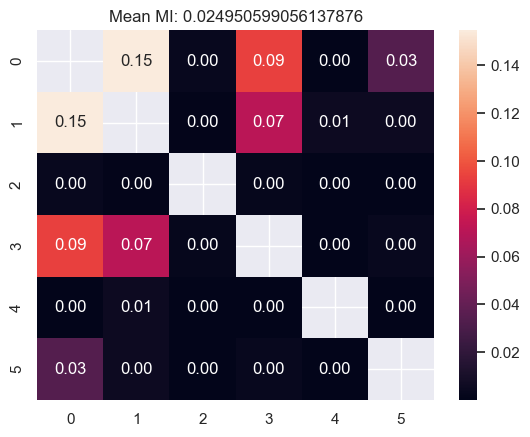

In [122]:
train_MI = np.array([[mutual_information(train_Y, y1, y2) for y1 in range(K)] for y2 in range(K)])
sns.heatmap(train_MI, annot=True, fmt='.2f')
plt.title(f'Mean MI: {np.nanmean(train_MI)}')

Text(0.5, 1.0, 'Mean MI: 0.020792165880114895')

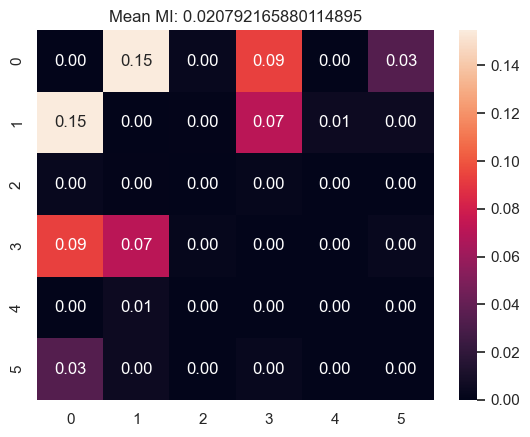

In [123]:
train_MI = np.array([[mutual_information_opt(train_Y, y1, y2) for y1 in range(K)] for y2 in range(K)])
sns.heatmap(train_MI, annot=True, fmt='.2f')
plt.title(f'Mean MI: {np.nanmean(train_MI)}')

In [106]:
def chi_square_test(data_y, y1, y2):
    if y1 == y2:
        return np.nan
    N = data_y.shape[0]
    Nij = N_ij(data_y, y1, y2)
    chi_sqr = N * (sum(Nij.diagonal()) - sum(np.fliplr(Nij).diagonal())) ** 2 / (
        sum(Nij[0]) * sum(Nij[1]) * sum(Nij[:,0]) * sum(Nij[:,1])
    )
    
    return chi_sqr

chi_square_test(train_Y, 0, 1)

2.5611888920192976

Text(0.5, 1.0, 'Mean chi square test: 0.7074810589281045')

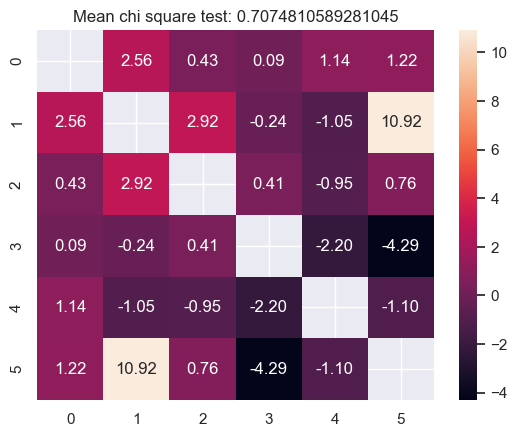

In [108]:
train_chi = np.array([[chi_square_test(train_Y, y1, y2) for y1 in range(K)] for y2 in range(K)])
sns.heatmap(train_chi, annot=True, fmt='.2f')
plt.title(f'Mean chi square test: {np.nanmean(train_chi)}')

<Axes: >

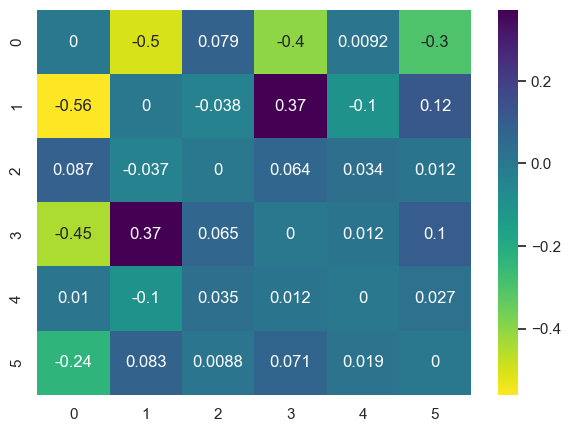

In [22]:
# Correlations in training set
plt.figure(figsize=(7,5))
cov = np.cov(train_Y.T)
D = np.sqrt(np.diag(cov))
DInv = 1 / D
cor = DInv * cov * DInv
np.fill_diagonal(cor, 0)

sns.heatmap(cor, annot=True, cmap='viridis_r')

Text(0.5, 1.0, 'Mean MI: 0.003836454783677509')

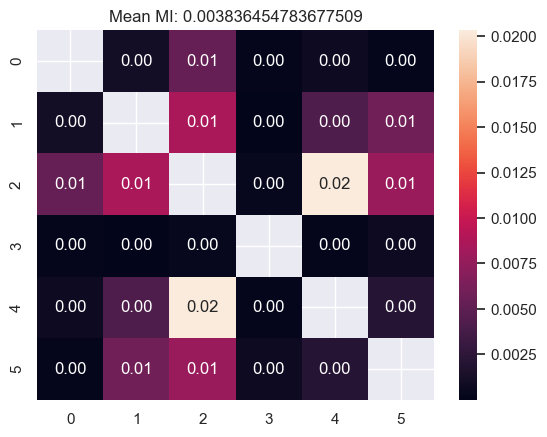

In [93]:
ood_MI = np.array([[mutual_information(ood_Y, y1, y2) for y1 in range(K)] for y2 in range(K)])
sns.heatmap(ood_MI, annot=True, fmt='.2f')
plt.title(f'Mean MI: {np.nanmean(ood_MI)}')

Text(0.5, 1.0, 'Mean chi square test: -3.657826941331742')

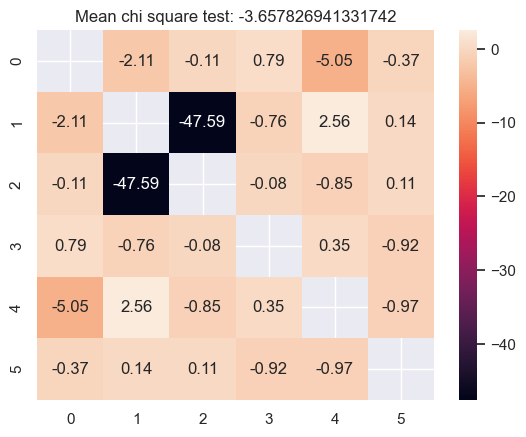

In [109]:
ood_chi = np.array([[chi_square_test(ood_Y, y1, y2) for y1 in range(K)] for y2 in range(K)])
sns.heatmap(ood_chi, annot=True, fmt='.2f')
plt.title(f'Mean chi square test: {np.nanmean(ood_chi)}')

<Axes: >

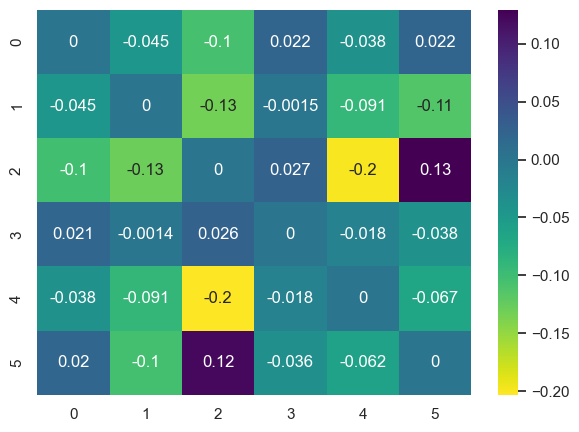

In [23]:
# Correlations in training set
plt.figure(figsize=(7,5))
cov = np.cov(ood_Y.T)
D = np.sqrt(np.diag(cov))
DInv = 1 / D
cor = DInv * cov * DInv
np.fill_diagonal(cor, 0)

sns.heatmap(cor, annot=True, cmap='viridis_r')

### Visualisations

In [59]:
with open(os.path.join('..', 'dicts','english_lvl2.json')) as json_file:
    english_dict = json.load(json_file)

In [60]:
english_dict

{'100000': 'A',
 '110000': 'B',
 '100100': 'C',
 '100110': 'D',
 '100010': 'E',
 '110100': 'F',
 '110110': 'G',
 '110010': 'H',
 '010100': 'I',
 '010110': 'J',
 '101000': 'K',
 '111000': 'L',
 '101100': 'M',
 '101110': 'N',
 '101010': 'O',
 '111100': 'P',
 '111110': 'Q',
 '111010': 'R',
 '011100': 'S',
 '011110': 'T',
 '101001': 'U',
 '111001': 'V',
 '010111': 'W',
 '101101': 'X',
 '101111': 'Y',
 '101011': 'Z',
 '000001': 'cc',
 '001111': '#',
 '010011': '.',
 '011001': '?',
 '001011': '"',
 '001001': '-',
 '000100': '^',
 '000011': 'll',
 '000101': 'ff',
 '000010': 'ii',
 '000110': 'ii',
 '000111': 'ii',
 '001100': 'ST',
 '001110': 'AR',
 '111101': 'AND',
 '111111': 'FOR',
 '111011': 'OF',
 '011101': 'THE',
 '011111': 'WITH',
 '001101': 'ING',
 '100001': 'CH',
 '110001': 'GH',
 '100101': 'SH',
 '100111': 'TH',
 '100011': 'WH',
 '110101': 'ED',
 '110111': 'ER',
 '110011': 'OU',
 '010101': 'OW',
 '010001': 'EN',
 '001010': 'IN',
 '011011': 'GG',
 '010000': 'EA\n(,)',
 '011000': 'BB\n(;

In [61]:
train_Y[i]

array([1, 0, 1, 1, 1, 0])

In [62]:
[train_Y[i].astype(bool)]

[array([ True, False,  True,  True,  True, False])]

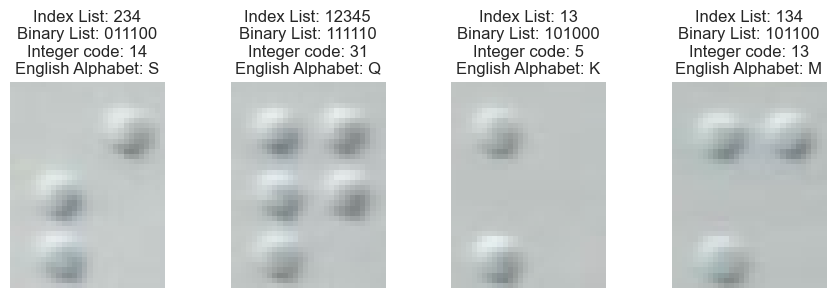

In [63]:
plt.figure(figsize=(9,3))
S = 4
index_list = (np.arange(K) + 1)

for i in range(S):
    sample = train_X[i]
    plt.subplot(1,S, i+1)
    plt.axis("off")
    y = train_Y[i]
    
    index_lbl = ''.join(index_list[y.astype(bool)].astype(str))
    lbl = ''.join(y.astype(str))
    num_lbl = bin_to_num(lbl)
    eng_lbl = english_dict[lbl]
    plt.imshow(sample)
    plt.title("Index List: {}\nBinary List: {}\nInteger code: {}\nEnglish Alphabet: {}".format(index_lbl, lbl, num_lbl, eng_lbl))

plt.tight_layout()

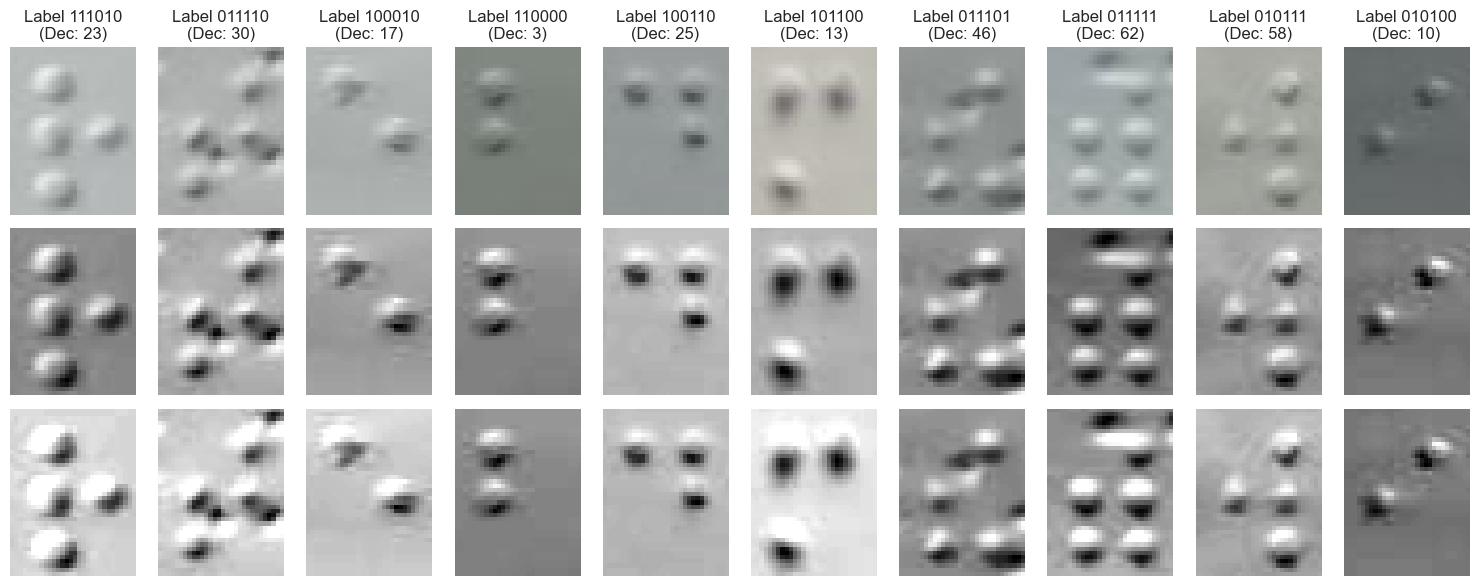

In [78]:
plt.figure(figsize=(15,6))
np.random.seed(101010)
subset = np.random.choice(np.arange(0, N), 10)

for i in range(10):
    sample = train_X[subset[i]]
    plt.subplot(3,10, i+1)
    plt.axis("off")
    lbl = ''.join(train_Y[subset[i]].astype(str))
    num_lbl = bin_to_num(lbl)
    plt.imshow(sample)
    plt.title("Label {}\n(Dec: {})".format(lbl, num_lbl))
    
    gray = cv2.cvtColor(sample[:,:,[0,1,2]], cv2.COLOR_RGB2GRAY)
    plt.subplot(3,10, i+11)
    plt.axis("off")
    plt.gray()
    plt.imshow(gray)
    
    norm = cv2.normalize(cv2.convertScaleAbs(gray, alpha=1.3, beta=0), None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    # norm = cv2.convertScaleAbs(gray, alpha=1.5, beta=0)
    plt.subplot(3,10, i+21)
    plt.axis("off")
    plt.imshow(norm)
    # print(f"Min / Max before norm: {np.min(gray)} / {np.max(gray)} and after: {round(np.min(norm), 2)}  / {round(np.max(norm), 2)}")
plt.tight_layout()

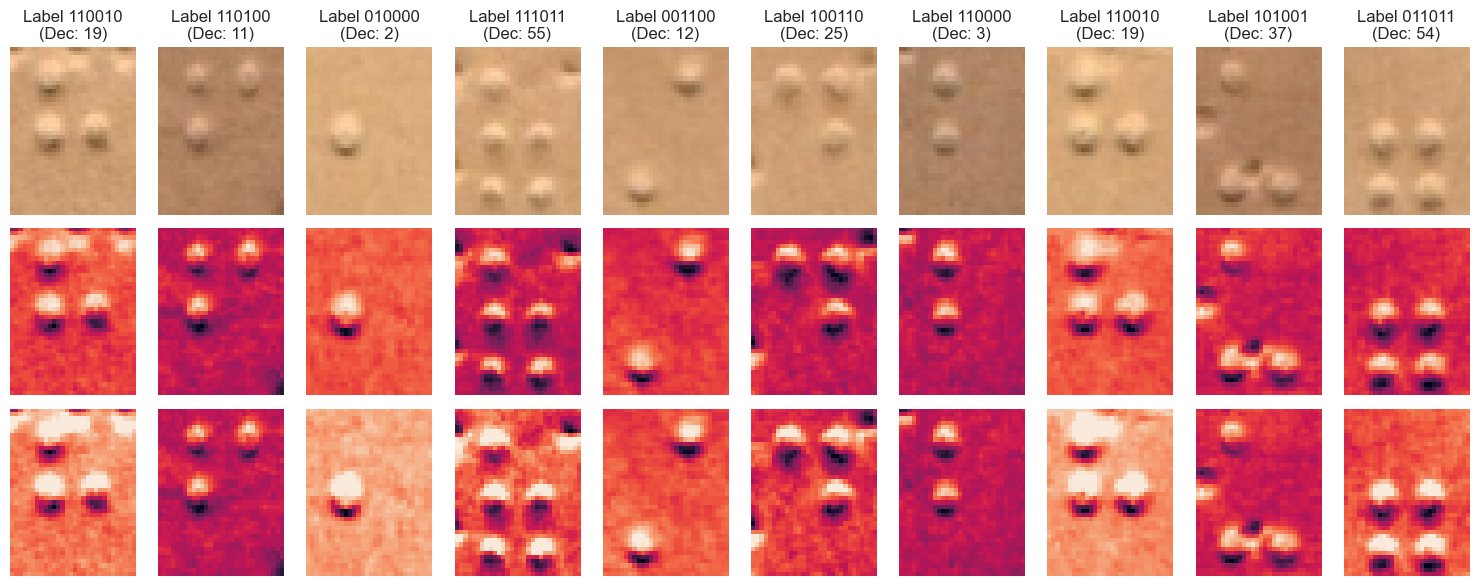

In [75]:
plt.figure(figsize=(15,6))
np.random.seed(101010)
subset = np.random.choice(np.arange(0, N_o), 10)

for i in range(10):
    sample = ood_X[subset[i]]#cv2.cvtColor(ood_X[subset[i]], cv2.COLOR_RGB2BGR) 
    plt.subplot(3,10, i+1)
    plt.axis("off")
    lbl = ''.join(ood_Y[subset[i]].astype(str))
    num_lbl = bin_to_num(lbl)
    plt.imshow(sample)
    plt.title("Label {}\n(Dec: {})".format(lbl, num_lbl))
    
    gray = cv2.cvtColor(sample, cv2.COLOR_RGB2GRAY)
    plt.subplot(3,10, i+11)
    plt.axis("off")
    plt.imshow(gray)
    
    norm = cv2.normalize(cv2.convertScaleAbs(gray, alpha=1.3, beta=0), None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    # norm = cv2.convertScaleAbs(gray, alpha=1.5, beta=0)
    plt.subplot(3,10, i+21)
    plt.axis("off")
    plt.imshow(norm)
    # print(f"Min / Max before norm: {np.min(gray)} / {np.max(gray)} and after: {round(np.min(norm), 2)}  / {round(np.max(norm), 2)}")
plt.tight_layout()

### Augmentation and Balanced Split
#### OLD CODE

Bias in binary labels of full data:
[42640 32322 35937 29602 33105 13603]
[67.31 51.03 56.73 46.73 52.26 21.47]


<BarContainer object of 6 artists>

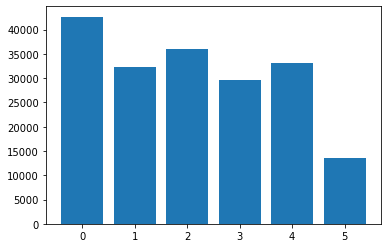

In [16]:
print("Bias in binary labels of full data:")
counts = np.sum(data_base_Y, axis=0)
print(counts)
balance_bin = np.round(counts / data_base_Y.shape[0], 4) * 100
print(balance_bin)
plt.bar(range(6), counts)

In [17]:
augment_indices = np.where(data_base_Y[:,0] == 1)[0]
augment_indices = augment_indices[:35000]
len(augment_indices)

35000

In [18]:
data_aug_X, data_aug_Y = list(), list()
with open(os.path.join('..','dicts','angelina_bin.json')) as json_file:
    relabel = json.load(json_file)

for i in augment_indices:
    sample = data_X[i]
    label = ''.join(data_base_Y[i].astype(str))

    data_aug_X.append(np.rot90(sample, 2))
    data_aug_Y.append(list(relabel[label]["rotate"]))

data_aug_X = np.array(data_aug_X)
data_aug_Y = np.array(data_aug_Y)

In [19]:
data_aug_X, data_aug_Y = np.concatenate((data_X, data_aug_X)), np.concatenate((data_base_Y, data_aug_Y)).astype(int)

Bias in binary labels of augmented data:
[47695 51027 47035 50670 43855 48603]
[48.5  51.89 47.83 51.52 44.59 49.42]


<BarContainer object of 6 artists>

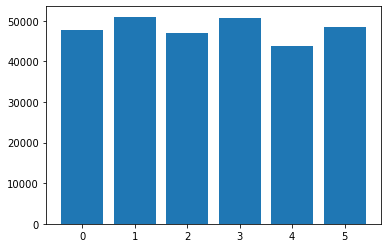

In [20]:
print("Bias in binary labels of augmented data:")
counts = np.sum(data_aug_Y, axis=0)
print(counts)
balance_aug_bin = np.round(counts / data_aug_Y.shape[0], 4) * 100
print(balance_aug_bin)
plt.bar(range(6), counts)

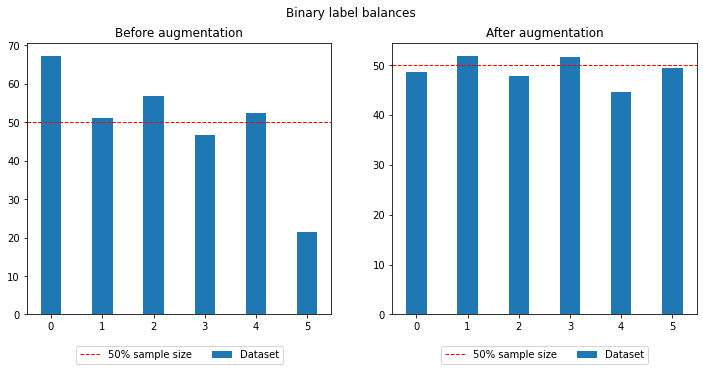

In [25]:
plt.figure(figsize=(12,5))
plt.suptitle("Binary label balances")
X_axis = np.arange(6)

plt.subplot(1, 2, 1)
plt.bar(X_axis, balance_bin, 0.4, label="Dataset")
plt.axhline(y=50, xmin=0, xmax=6, c="red", linewidth=1, linestyle="dashed", label="50% sample size")
plt.legend(bbox_to_anchor =(0.5, -0.2), loc='lower center', ncol=3)
plt.title("Before augmentation")

plt.subplot(1, 2, 2)
plt.bar(X_axis, balance_aug_bin, 0.4, label="Dataset")
plt.axhline(y=50, xmin=0, xmax=6, c="red", linewidth=1, linestyle="dashed", label="50% sample size")
plt.legend(bbox_to_anchor =(0.5, -0.2), loc='lower center', ncol=3)
plt.title("After augmentation")

plt.savefig('ts_binary_balance.png')

In [22]:
os_balance = [61.55, 49.04, 53.65, 48.9,  54.1,  28.15]
os_aug_balance = [48.06, 51.57, 48.06, 48.06, 51.57, 48.06]

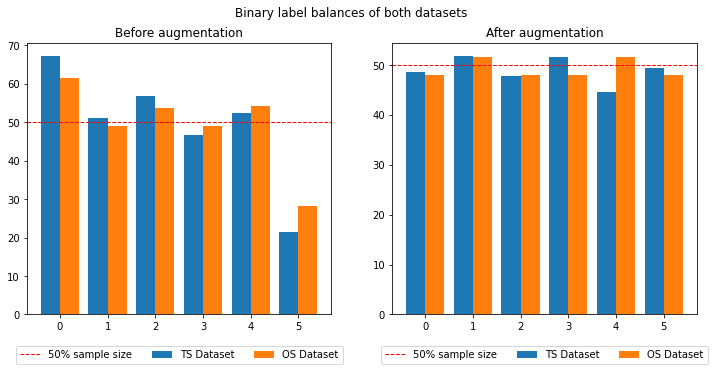

In [29]:
plt.figure(figsize=(12,5))
plt.suptitle("Binary label balances of both datasets")
X_axis = np.arange(6)

plt.subplot(1, 2, 1)
plt.bar(X_axis-0.2, balance_bin, 0.4, label="TS Dataset")
plt.bar(X_axis+0.2, os_balance, 0.4, label="OS Dataset")

plt.axhline(y=50, xmin=0, xmax=6, c="red", linewidth=1, linestyle="dashed", label="50% sample size")
plt.legend(bbox_to_anchor =(0.5, -0.2), loc='lower center', ncol=3)
plt.title("Before augmentation")

plt.subplot(1, 2, 2)
plt.bar(X_axis-0.2, balance_aug_bin, 0.4, label="TS Dataset")
plt.bar(X_axis+0.2, os_aug_balance, 0.4, label="OS Dataset")
plt.axhline(y=50, xmin=0, xmax=6, c="red", linewidth=1, linestyle="dashed", label="50% sample size")
plt.legend(bbox_to_anchor =(0.5, -0.2), loc='lower center', ncol=3)
plt.title("After augmentation")

plt.savefig('all_binary_balance.png')

In [22]:
print(data_aug_X.shape)
print(data_aug_Y.shape)

(98345, 28, 28, 1)
(98345, 6)
